<span style="color:Black;">**Importing all necessary libraries in python**</span>


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
import warnings

<span style="color:Black;">**Loading the dataset (https://www.kaggle.com/datasets/shivamb/netflix-shows)**</span>

In [55]:
netflix_data=pd.read_csv('netflix_titles.csv')

**____________________________________________________________________________________________________________________________**

<div style="text-align: center; color: Maroon; font-weight: bold; font-size: 18px;">-----Analysis of Content Creators Trend on Netflix-----</div>

<p style="text-align: justify;">This code performs data preprocessing and analysis on a Netflix dataset. It first removes duplicate rows and fills missing values with 'Unknown' for categorical columns. The 'country' column is standardized with title case formatting. The script then analyzes and visualizes the dataset's top 10 genres, directors, and actors. The output includes three horizontal bar charts displaying the top 10 genres, directors, and actors on Netflix, with distinct patterns for each chart.</p>

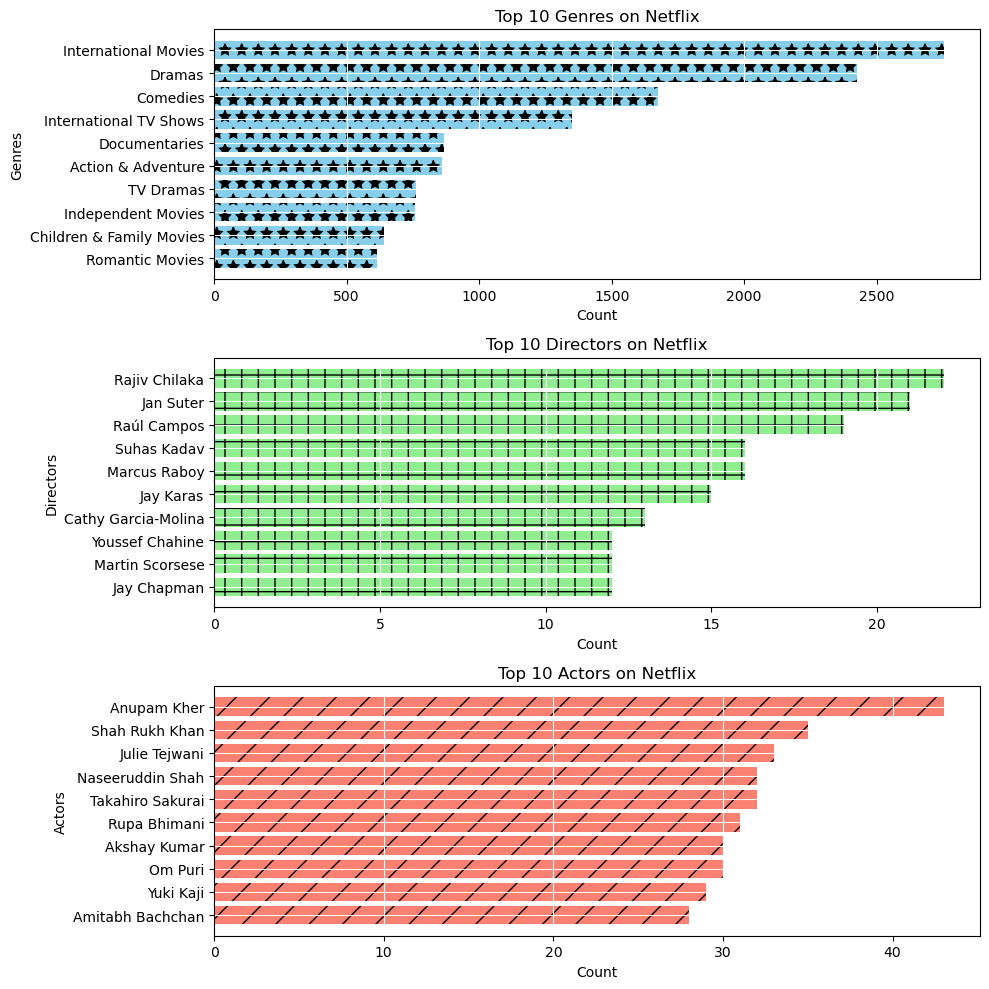

In [28]:
# Remove duplicate rows from the dataset
netflix_data_cleaned = netflix_data.drop_duplicates()

# Fill missing values for categorical columns with 'Unknown'
netflix_data_cleaned['director'].fillna('Unknown', inplace=True)
netflix_data_cleaned['cast'].fillna('Unknown', inplace=True)
netflix_data_cleaned['country'].fillna('Unknown', inplace=True)

# Check for null values in the cleaned dataset
netflix_data_cleaned.isnull().sum()

# Standardize the 'country' column by capitalizing the first letter of each word
netflix_data_cleaned['country'] = netflix_data_cleaned['country'].str.title()

# Genre Analysis using a dictionary
genre_dict = {}
for sublist in netflix_data_cleaned['listed_in'].str.split(','):
    for genre in sublist:
        genre = genre.strip()
        genre_dict[genre] = genre_dict.get(genre, 0) + 1

# Sorting and getting the top 10 genres
top_genres_dict = sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Director Analysis using a dictionary
director_dict = {}
for sublist in netflix_data_cleaned[netflix_data_cleaned['director'] != 'Unknown']['director'].str.split(','):
    for director in sublist:
        director = director.strip()
        director_dict[director] = director_dict.get(director, 0) + 1

# Sorting and getting the top 10 directors
top_directors_dict = sorted(director_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Actor Analysis using a dictionary
actor_dict = {}
for sublist in netflix_data_cleaned[netflix_data_cleaned['cast'] != 'Unknown']['cast'].str.split(','):
    for actor in sublist:
        actor = actor.strip()
        actor_dict[actor] = actor_dict.get(actor, 0) + 1

# Sorting and getting the top 10 actors
top_actors_dict = sorted(actor_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Extracting names and counts for visualization
genre_names, genre_counts = zip(*top_genres_dict)
director_names, director_counts = zip(*top_directors_dict)
actor_names, actor_counts = zip(*top_actors_dict)

# Create subplots for visualization
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Define patterns for the charts
patterns = ["*", "+", "/"]

# Top Genres with a single pattern
axes[0].barh(genre_names, genre_counts, color='skyblue', hatch=patterns[0])
axes[0].set_title('Top 10 Genres on Netflix')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Genres')
axes[0].invert_yaxis()
axes[0].grid(True, linestyle='-', color='white')

# Top Directors with a single pattern
axes[1].barh(director_names, director_counts, color='lightgreen', hatch=patterns[1])
axes[1].set_title('Top 10 Directors on Netflix')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Directors')
axes[1].invert_yaxis()
axes[1].grid(True, linestyle='-', color='white')

# Top Actors with a single pattern
axes[2].barh(actor_names, actor_counts, color='salmon', hatch=patterns[2])
axes[2].set_title('Top 10 Actors on Netflix')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Actors')
axes[2].invert_yaxis()
axes[2].grid(True, linestyle='-', color='white')

# Display the plots
plt.tight_layout()
plt.show()

<p style ="text-align: justify;"> The output consists of three separate bar charts displayed in a vertical stack due to the subplots configuration. 

* The first bar chart (in sky blue with a star pattern) represents the top 10 genres on Netflix, with the x-axis showing the count and the y-axis listing the genres. 

* The second chart (in light green with a plus pattern) shows the top 10 directors, with the same axis configuration. 

* The third chart (in salmon with a slash pattern) depicts the top 10 actors, again with count on the x-axis and actor names on the y-axis. </p>

**____________________________________________________________________________________________________________________________**

<div style="text-align: center; color: Maroon; font-weight: bold; font-size: 18px;">-----Analysis of Popularity of Content Types in Various Countries-----</div>

<p style="text-align: justify;">This code section focuses on standardizing the Netflix dataset for analysis. It starts by capitalizing the 'country' column to ensure consistent formatting. It then filters out entries with 'Unknown' or empty values in 'country,' extracting relevant columns ('type,' 'country,' 'title'). The code splits multiple countries into separate rows and counts the number of titles for each content type in each country. The resulting data is normalized to show the relative popularity of content types in the top 10 countries. Finally, it plots a stacked bar chart to visualize the distribution of content types across these countries.</p>


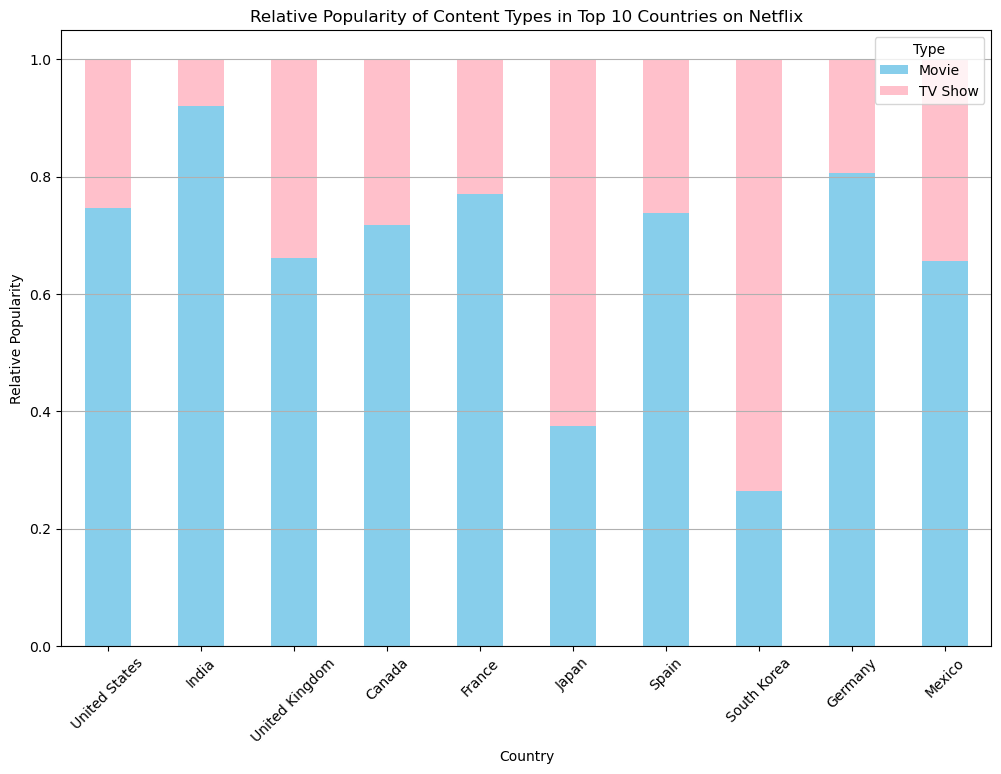

In [29]:
netflix_data_cleaned = netflix_data.copy()
netflix_data_cleaned['country'] = netflix_data_cleaned['country'].str.title()

# Filter out entries with 'Unknown' or empty values in 'country'
netflix_data_cleaned = netflix_data_cleaned[~netflix_data_cleaned['country'].isna()]
netflix_data_cleaned = netflix_data_cleaned[netflix_data_cleaned['country'].str.lower() != 'unknown']

content_data = netflix_data_cleaned[['type', 'country', 'title']]

# Split countries and create separate rows for each country
content_data = content_data.assign(country=content_data['country'].str.split(', ')).explode('country')

country_type_count = content_data.groupby(['country', 'type']).size().unstack().fillna(0)

# Optional: Normalize counts by total number of titles in each country
country_type_count['Total'] = country_type_count.sum(axis=1)
for type_col in country_type_count.columns[:-1]:
    country_type_count[type_col] = country_type_count[type_col] / country_type_count['Total']

top_countries = country_type_count.sort_values('Total', ascending=False).head(10)

# Plot the distribution of content types in the top 10 countries
plt.figure(figsize=(12, 8))
top_countries.drop('Total', axis=1).plot(kind='bar', stacked=True, color=['skyblue', 'pink'], ax=plt.gca())
plt.title('Relative Popularity of Content Types in Top 10 Countries on Netflix')
plt.xlabel('Country')
plt.ylabel('Relative Popularity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Type')
plt.show()

<p style="text-align: justify;"> The output image shows the relative popularity of Movies and TV Shows in the top 10 countries on Netflix. Each bar represents a country and is divided into two segments, showing the proportion of Movies (in blue) and TV Shows (in pink). The total height of each bar represents 100% of the content available in that country. This visualization allows us to compare the preference for Movies versus TV Shows across different regions. For example, we can see that Movies are more popular than TV Shows in the United States, while in countries like South Korea, TV Shows are more popular. This information could be valuable for Netflix when deciding what type of content to promote or invest in for each country. </P>

**____________________________________________________________________________________________________________________________**

<p style="text-align: justify;">We focused on data standardization and formatting. We capitalize the 'country' column for consistent formatting and structure the data for further analysis. The analysis aims to understand the popularity of different types of content in various countries on Netflix. Relevant columns ('type', 'country', and 'title') are extracted and missing values are dropped. We split countries into separate rows, group the data by country and content type, and count the number of titles. The result is a dataset showcasing the number of movies and TV shows in each country. We then sort the countries by the total number of titles and select the top 10. Finally, a stacked bar chart is plotted to visualize the distribution of content types in these top countries.</p>


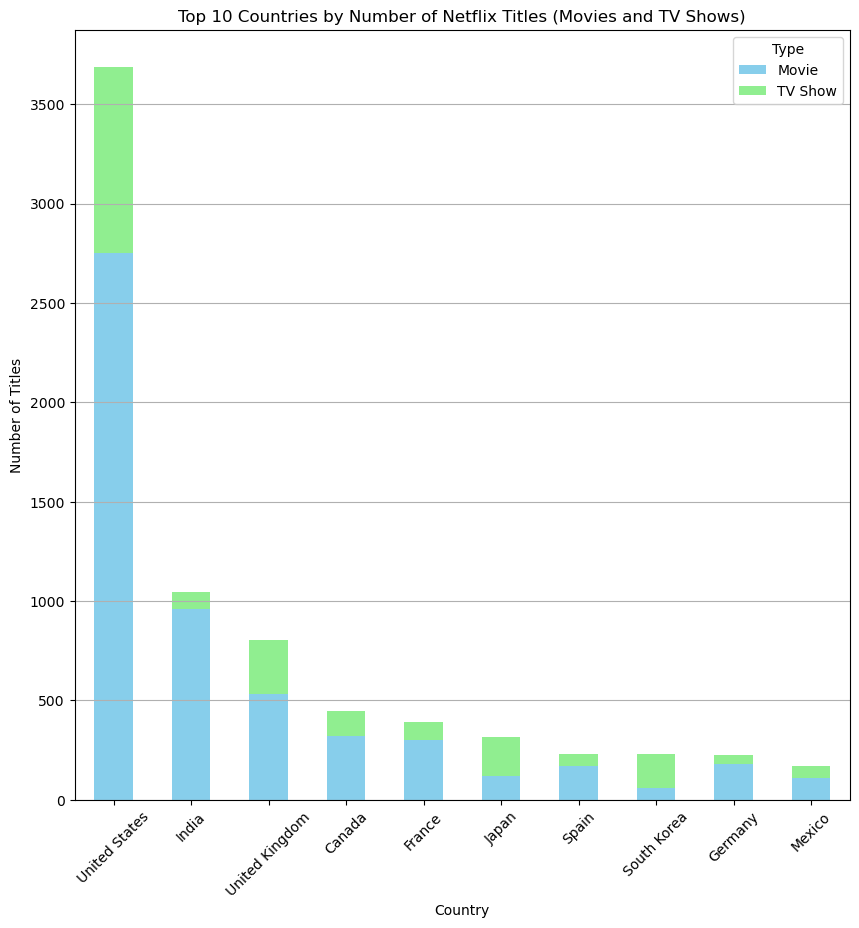

In [34]:
# Data Standardization and Formatting
netflix_data_cleaned['country'] = netflix_data_cleaned['country'].str.title()

# Analyzing the popularity of different types of content in various countries
# Extract relevant columns: 'type', 'country', and 'title', and drop rows with missing values
content_data = netflix_data_cleaned[['type', 'country', 'title']].dropna()

# Splitting countries and creating separate rows for each country
content_data = content_data.assign(country=content_data['country'].str.split(', ')).explode('country')

# Grouping by country and type, and counting the number of titles
country_type_count = content_data.groupby(['country', 'type']).size().unstack().fillna(0)

# Calculating total titles for each country
country_type_count['Total'] = country_type_count.sum(axis=1)

# Sorting countries by total titles and selecting the top 10
top_countries = country_type_count.sort_values('Total', ascending=False).head(10)

# Plotting the distribution of content types in the top 10 countries
plt.figure(figsize=(10, 10))
top_countries.drop('Total', axis=1).plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], ax=plt.gca())
plt.title('Top 10 Countries by Number of Netflix Titles (Movies and TV Shows)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Type')
plt.show()


<p style="text-align: justify;">The resulting image visualizes the count of Netflix titles available in the top 10 countries. Each bar represents a country, with the height indicating the total number of titles available there. The colors within the bars indicate the proportion of Movies versus TV Shows. For example, in the United States, there is a significant number of both Movies and TV Shows, with Movies making up a larger portion of the total content. This type of visualization helps to quickly understand which countries have the largest selection of Netflix content and the distribution between Movies and TV Shows in those countries. </p>

**____________________________________________________________________________________________________________________________**

<div style="text-align: center; color: Maroon; font-weight: bold; font-size: 18px;">-----Forecasting Content Addition Trends in Selected Countries-----</div>

<p style="text-align: justify;">This code forecasts the trend of content addition on Netflix for a selected set of countries over the next three years. It uses an Autoregressive (AR) model for the forecast. The countries of interest are the United States, India, Japan, South Korea, and Brazil. The code first prepares the data, ensuring meaningful data points starting from 2012, and then applies the AR model with a chosen lag value. The resulting forecasts are stored for each country. Finally, the code visualizes the historical data and the forecasted trends for content addition in these countries using a set of subplots.</p>


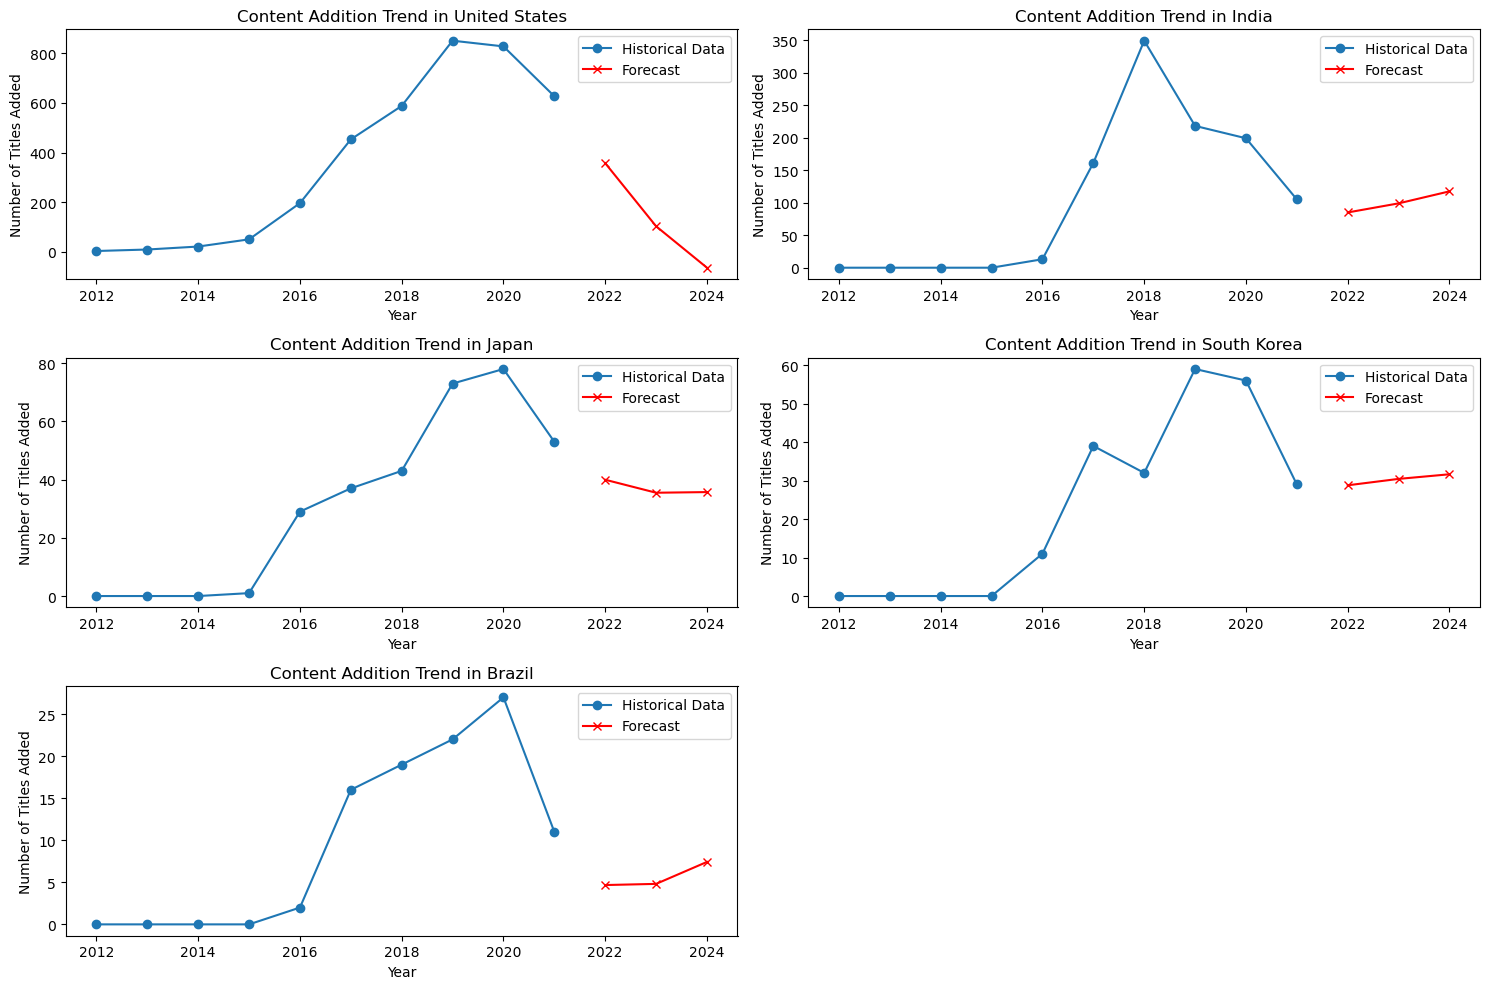

In [39]:
# Ignoring warnings for simplicity
warnings.filterwarnings("ignore")

# Selecting countries and forecast period
selected_countries = ['United States', 'India', 'Japan', 'South Korea', 'Brazil']
forecast_years = 3
ar_forecast_results = {}

# Forecasting using the AR model
for country in selected_countries:
    data = country_time_series.loc[country].dropna()
    data = data[data.index >= 2012]  # Ensure meaningful data
    lag = 2  # Choose a lag value, can be tuned
    model = AutoReg(data, lags=lag, old_names=False)
    model_fit = model.fit()
    forecast = model_fit.predict(start=len(data), end=len(data) + forecast_years - 1, dynamic=True)
    ar_forecast_results[country] = forecast

# Visualization
plt.figure(figsize=(15, 10))
for i, country in enumerate(selected_countries, 1):
    plt.subplot(3, 2, i)
    data = country_time_series.loc[country].dropna()
    data = data[data.index >= 2012]
    plt.plot(data.index, data, label='Historical Data', marker='o')
    forecast_years_index = np.arange(data.index.max() + 1, data.index.max() + 1 + forecast_years)
    plt.plot(forecast_years_index, ar_forecast_results[country], label='Forecast', marker='x', color='red')
    plt.title(f"Content Addition Trend in {country}")
    plt.xlabel("Year")
    plt.ylabel("Number of Titles Added")
    plt.legend()
    plt.tight_layout()

plt.show()

<p style="text-align: justify;">From the output, The blue line represents historical data, showing how the number of titles added has evolved over the years. The red line represents the forecast, indicating the predicted trend for the next three years. 
These visualizations can help identify which markets might experience growth in content availability, potentially guiding strategic decisions for content distribution on Netflix.For example, it can be observed whether content additions are expected to increase or decrease in the selected countries. </p>

**____________________________________________________________________________________________________________________________**

<div style="text-align: center; color: Maroon; font-weight: bold; font-size: 18px;">-----Forecasting Content Addition Trends in Potential Markets-----</div>

<p style="text-align: justify;">This code performs content addition trend forecasting for multiple countries on Netflix. It utilizes an Autoregressive (AR) model to predict the number of titles added in the next three years. After preparing the data, the AR model is applied, and forecasts are stored for each country. The code then identifies potential new markets based on forecasted trends and displays their forecasts. Finally, it generates visualizations for up to five selected potential markets, plotting historical data against forecasted trends for content addition. This analysis aids in identifying countries with growth potential in Netflix's content library.</p>

Argentina: 10     9.872676
11     9.458204
12    10.003025
dtype: float64

Austria: 10    1.424779
11    1.519383
12    1.571256
dtype: float64

Bangladesh: 10    0.526316
11    0.581717
12    0.537688
dtype: float64

Brazil: 10    4.677255
11    4.815817
12    7.427783
dtype: float64

Cambodia: 10    0.62500
11    0.68750
12    0.65625
dtype: float64

Canada: 10    62.427492
11    64.911379
12    66.647192
dtype: float64

Cayman Islands: 10    1.110223e-16
11   -1.110223e-16
12    3.333333e-01
dtype: float64

Chile: 10    2.398158
11    3.207521
12    3.596593
dtype: float64

Croatia: 10    0.333333
11    0.555556
12    0.592593
dtype: float64

Denmark: 10    4.823146
11    5.386389
12    5.859517
dtype: float64

Egypt: 10   -31.727234
11   -25.822070
12    14.348661
dtype: float64

Georgia: 10    0.2500
11    0.3750
12    0.3125
dtype: float64

Ghana: 10    0.166667
11   -0.027778
12    0.226852
dtype: float64

Greece: 10    1.183369
11    1.373082
12    1.344723
dtype: float64

Guat

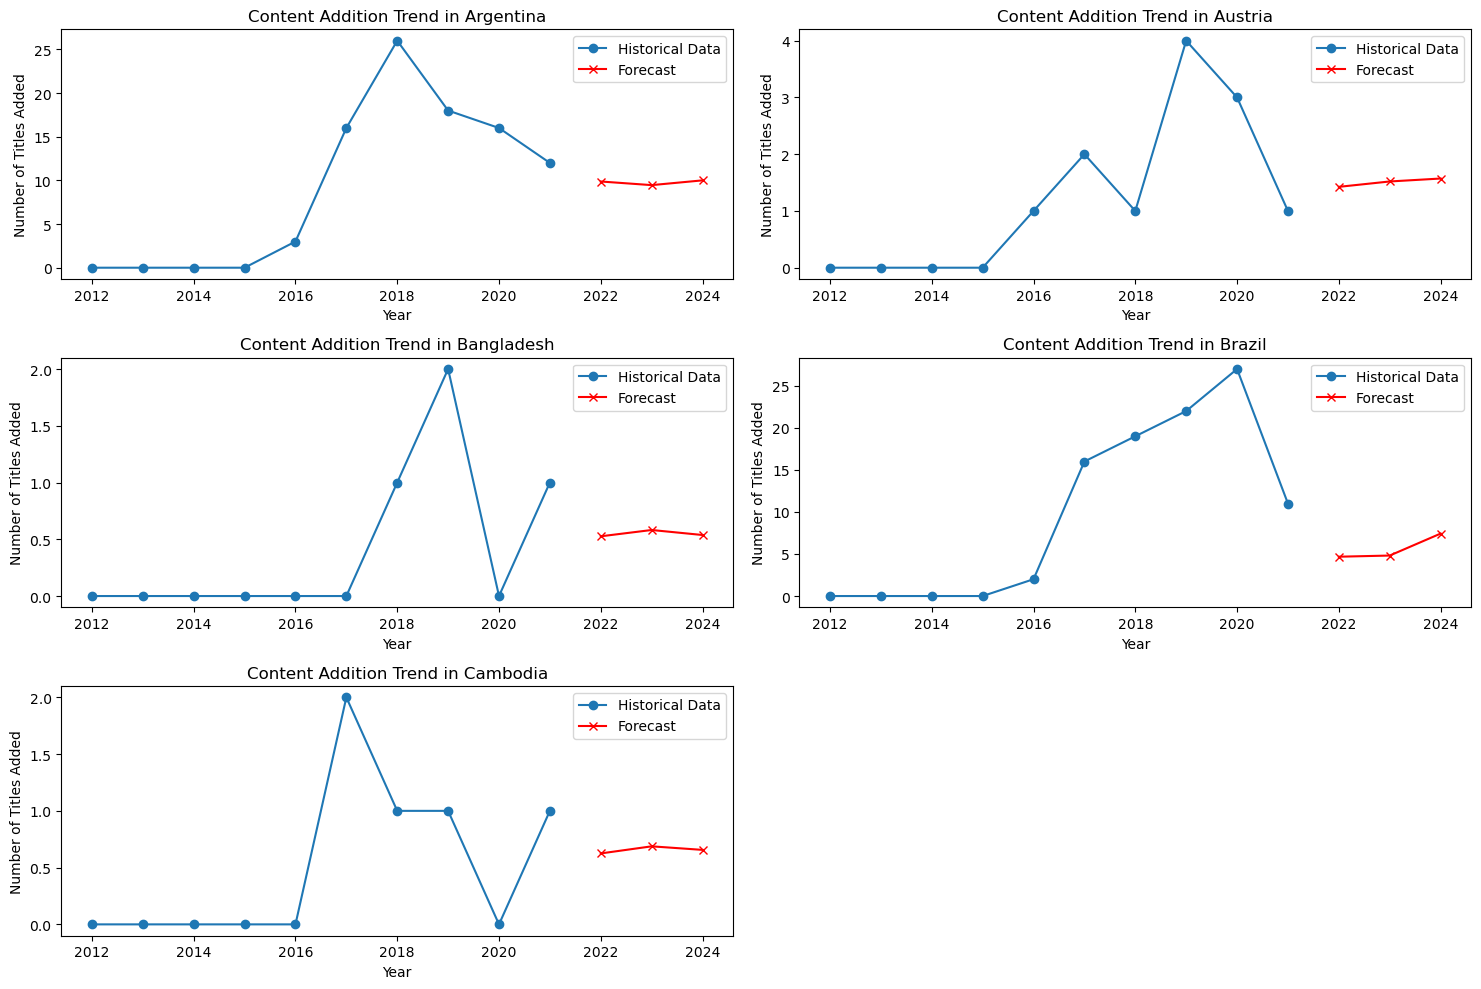

In [40]:
# Forecasting for all countries
forecast_years = 3
all_forecasts = {}

for country in country_time_series.index:
    data = country_time_series.loc[country].dropna()
    data = data[data.index >= 2012]  # Ensuring meaningful data
    if len(data) < 3:  # Skipping countries with very few data points
        continue
    lag = 2  # Choosing a lag value, can be tuned
    model = AutoReg(data, lags=lag, old_names=False)
    model_fit = model.fit()
    forecast = model_fit.predict(start=len(data), end=len(data) + forecast_years - 1, dynamic=True)
    all_forecasts[country] = forecast

# Identifying potential new markets
potential_markets = {country: forecast for country, forecast in all_forecasts.items() if forecast.iloc[-1] > forecast.iloc[0]}

# Displaying the identified potential new markets and their forecasts
for country, forecast in potential_markets.items():
    print(f"{country}: {forecast}\n")

# Generating visualizations for the identified potential new markets
# Limiting to a maximum of 5 countries for clarity in visualization
selected_potential_markets = list(potential_markets.keys())[:5]

plt.figure(figsize=(15, 10))

for i, country in enumerate(selected_potential_markets, 1):
    plt.subplot(3, 2, i)
    historical_data = country_time_series.loc[country].dropna()
    historical_data = historical_data[historical_data.index >= 2012]  # Ensuring meaningful data

    # Plotting historical data
    plt.plot(historical_data.index, historical_data, label='Historical Data', marker='o')

    # Plotting forecasted data
    forecast = potential_markets[country]
    forecast_years_index = np.arange(historical_data.index.max() + 1, historical_data.index.max() + 1 + forecast_years)
    plt.plot(forecast_years_index, forecast, label='Forecast', marker='x', color='red')

    plt.title(f"Content Addition Trend in {country}")
    plt.xlabel("Year")
    plt.ylabel("Number of Titles Added")
    plt.legend()
    plt.tight_layout()

plt.show()


<p style="text-align: justify;">The output is a series of predictions for each country. Each forecast is represented as a pandas Series object with index values starting from 10, corresponding to the first forecasted year, and values representing the predicted number of titles. 
For instance: Argentina's Forecast: It starts with an index of 10 (the first forecasted year) with a forecast of approximately 9.87 titles, indicating that the model expects around 9 to 10 titles to be added to Netflix in Argentina in that year. In visualization we are representing both the red line as forcast and blue line as historical data same like the previous code</p>

**____________________________________________________________________________________________________________________________**

<div style="text-align: center; color: Maroon; font-weight: bold; font-size: 18px;">-----Analyzing the Most Popular Netflix Categories and Their Evolution Over Time-----</div>

<p style="text-align: justify;">This code focuses on analyzing the most popular Netflix categories and how they have evolved over time. It starts by extracting and preparing genre data from the Netflix dataset. The genre data is then grouped by genre and release year to understand the trend. To facilitate plotting, the data is transposed. The code proceeds to visualize the evolution of the top 5 Netflix categories over time, with each category represented as a line chart. The resulting graph provides insights into the growth and popularity of these categories. Finally, the code returns the top genres for further analysis.</p>

<Figure size 1500x800 with 0 Axes>

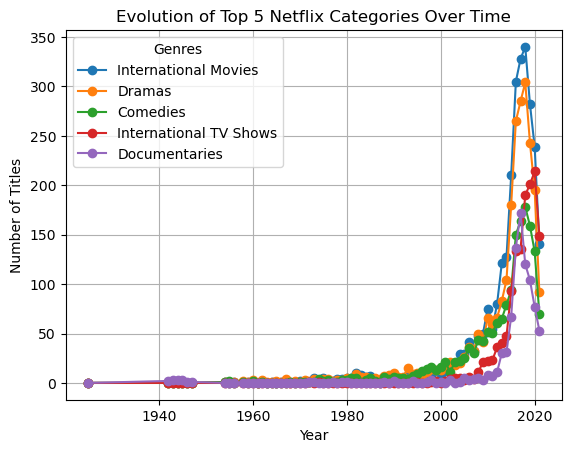

Index(['International Movies', 'Dramas', 'Comedies', 'International TV Shows',
       'Documentaries'],
      dtype='object', name='listed_in')

In [41]:
# Extracting and preparing the genre data
netflix_data['listed_in'] = netflix_data['listed_in'].str.split(', ')
genre_data = netflix_data.explode('listed_in')

# Grouping by genre and release year to see the trend
genre_evolution = genre_data.groupby(['listed_in', 'release_year']).size().unstack(fill_value=0)

# Transposing for easier plotting
genre_evolution_transposed = genre_evolution.transpose()

# Plotting the evolution of top genres over time
plt.figure(figsize=(15, 8))
top_genres = genre_evolution.sum(axis=1).nlargest(5).index
genre_evolution_transposed[top_genres].plot(kind='line', marker='o')
plt.title('Evolution of Top 5 Netflix Categories Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genres')
plt.grid(True)
plt.show()

# Returning the top genres for further analysis
top_genres

<p style="text-align: justify;">The output is a line chart that illustrates the evolution of the top 5 Netflix content categories over time. Each line represents a category, and the x-axis represents the years, while the y-axis represents the number of titles in each category. By analyzing this chart, you can gain insights into how these popular categories have evolved on Netflix, offering a snapshot of the platform's content trends over the years.</p>

**____________________________________________________________________________________________________________________________**

<div style="text-align: center; color: Maroon; font-weight: bold; font-size: 18px;">-----Forecasting Genre Popularity Trends with AR Model-----</div>

<p style="text-align: justify;">This code focuses on forecasting the popularity of the top 5 Netflix content genres for the year 2021 using an AutoRegressive (AR) model, based on historical data from 2012 to 2020. It begins by extracting genre data from the Netflix dataset and grouping it by genre and release year. After identifying the top 5 genres, the code implements the AR forecasting approach for each genre. The resulting forecasts are visualized alongside the actual data for 2020, allowing for a comparison of predicted and observed trends. This analysis provides insights into the expected growth or decline of these genres in the coming year.</p>

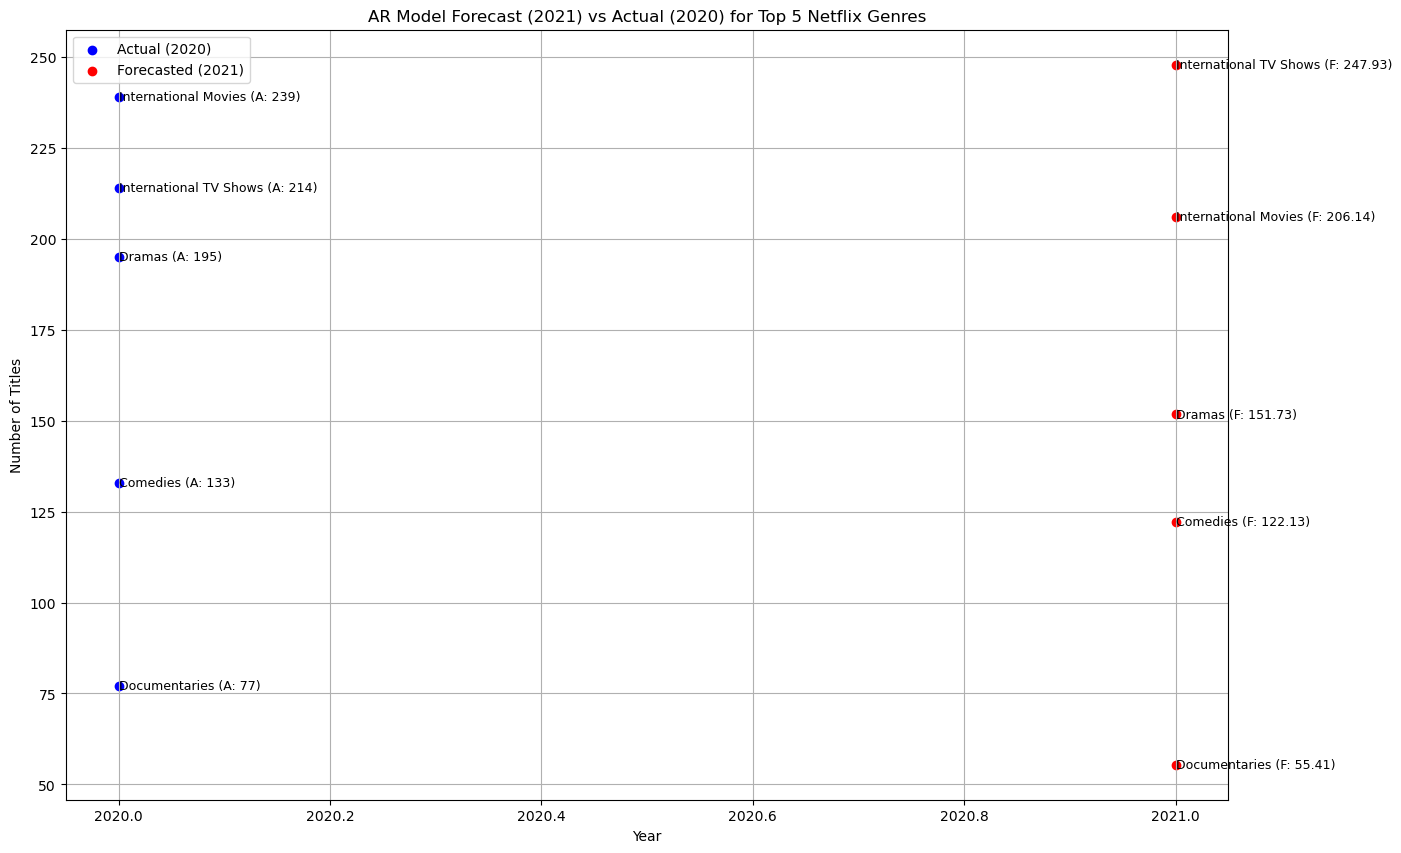

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import warnings

# Load the dataset
netflix_data = pd.read_csv('netflix_titles.csv')

# Extracting and preparing the genre data
netflix_data['listed_in'] = netflix_data['listed_in'].str.split(', ')
genre_data = netflix_data.explode('listed_in')

# Grouping by genre and release year to see the trend
genre_evolution = genre_data.groupby(['listed_in', 'release_year']).size().unstack(fill_value=0)

# Identifying the top 5 genres
top_genres = genre_evolution.sum(axis=1).nlargest(5).index

# Implementing the forecasting approach
forecasted_genre_data = {}
latest_year_for_forecast = genre_evolution.columns.max()
actual_year = latest_year_for_forecast - 1
forecast_year = latest_year_for_forecast

# Ignoring warnings for simplicity
warnings.filterwarnings("ignore")

for genre in top_genres:
    genre_series = genre_evolution.loc[genre]
    train_data = genre_series.iloc[:-1]

    if len(train_data) < 5:
        continue

    model = AutoReg(train_data, lags=2, old_names=False)
    model_fit = model.fit()
    forecasted_genre_data[genre] = model_fit.predict(start=len(train_data), end=len(train_data), dynamic=True)

# Visualizing the forecasted data with annotations
plt.figure(figsize=(15, 10))
for genre, forecast in forecasted_genre_data.items():
    actual = genre_evolution.loc[genre, actual_year]
    forecast_value = forecast.iloc[0]

    # Plotting actual and forecasted points
    plt.scatter([actual_year], [actual], color='blue', label='Actual (2020)' if genre == top_genres[0] else "")
    plt.scatter([forecast_year], [forecast_value], color='red', label='Forecasted (2021)' if genre == top_genres[0] else "")

    # Adding text annotations
    plt.text(actual_year, actual, f"{genre} (A: {actual})", verticalalignment='center', horizontalalignment='left', fontsize=9)
    plt.text(forecast_year, forecast_value, f"{genre} (F: {forecast_value:.2f})", verticalalignment='center', horizontalalignment='left', fontsize=9)

plt.title('AR Model Forecast (2021) vs Actual (2020) for Top 5 Netflix Genres')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

<p style="text-align: justify;">The visualization compares the actual number of titles in 2020 with the forecasted number of titles in 2021 for each of the top 5 genres. The x-axis shows the transition from the actual year (2020) to the forecasted year (2021), while the y-axis shows the number of titles. 

Blue Points: Represent the actual number of titles in each genre for 2020. 

Red Points: Represent the forecasted number of titles in each genre for 2021. 

Annotations: Each point has a label indicating the genre and the number of titles (actual or forecasted). 

From the visualization, it appears that the AR model forecasts a slight increase in the number of titles for most genres from 2020 to 2021. Each genre's forecasted value is annotated with the genre name and the forecasted number (rounded to two decimal places).</p>

**____________________________________________________________________________________________________________________________**

<div style="text-align: center; color: Maroon; font-weight: bold; font-size: 18px;">-----Analyzing Netflix Content by Content Ratings and Titles-----</div>

<p style="text-align: justify;">This code analyzes the Netflix dataset to gain insights into the distribution of content ratings and their evolution over the years. First, it checks for missing values in the 'rating' and 'date_added' columns. Then, it counts the number of titles per rating category and creates a heatmap showing the distribution of titles added to Netflix each year for each rating. This analysis helps visualize trends in content ratings and their growth on the platform. The code also includes data visualization using seaborn to present the results in a clear and informative way.</p>

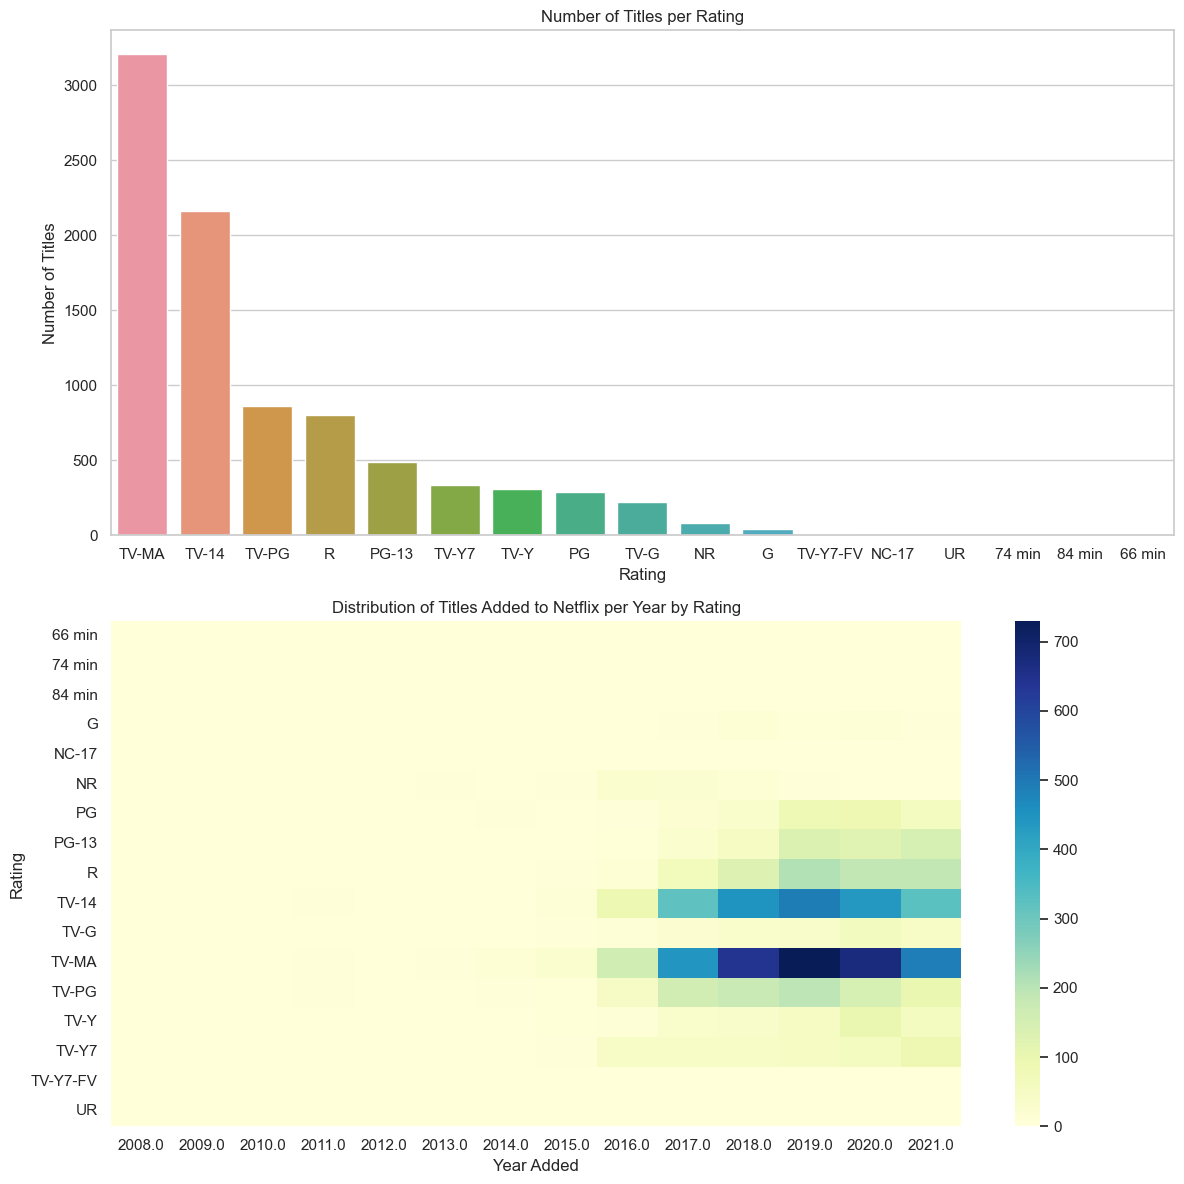

In [56]:
# Checking for missing values in 'rating' and 'date_added' columns
missing_ratings = netflix_data['rating'].isnull().sum()
missing_date_added = netflix_data['date_added'].isnull().sum()

# Analysis plan:
# 1. Count the number of titles per rating
rating_counts = netflix_data['rating'].value_counts()

# 2. Analyze the distribution of release years per rating
# Drop rows where 'rating' or 'release_year' is missing and create a copy
netflix_data_clean = netflix_data.dropna(subset=['rating', 'release_year']).copy()

# 3. Look at the Date Added to Netflix
# Convert 'date_added' to datetime, handling non-standard formats
netflix_data_clean['date_added'] = pd.to_datetime(netflix_data_clean['date_added'], errors='coerce')
netflix_data_clean['year_added'] = netflix_data_clean['date_added'].dt.year

# Group by rating and year added to see the trend
year_added_rating = netflix_data_clean.groupby(['rating', 'year_added']).size().unstack(fill_value=0)

# Visualization setup
sns.set(style="whitegrid")

# Plotting the results
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot for count of titles per rating
sns.barplot(x=rating_counts.index, y=rating_counts.values, ax=axes[0])
axes[0].set_title('Number of Titles per Rating')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Titles')

# Plot for distribution of titles added per year for each rating
sns.heatmap(year_added_rating, cmap="YlGnBu", ax=axes[1])
axes[1].set_title('Distribution of Titles Added to Netflix per Year by Rating')
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('Rating')

plt.tight_layout()
plt.show()

<p style="text-align: justify;">This output comprises two informative visualizations. The initial visualization is a bar plot showcasing the count of titles within each rating category on Netflix, offering a comprehensive view of the content distribution based on ratings. The subsequent visualization is a heatmap that presents the distribution of titles added to Netflix across various years, categorized by their respective ratings. These visualizations aid in comprehending the popularity and evolving trends of content ratings on the platform throughout time.</p>

**____________________________________________________________________________________________________________________________**

<div style="text-align: center; color: Maroon; font-weight: bold; font-size: 18px;">-----Analyzing Netflix Content by Content Type and Duration-----</div>

<p style="text-align: justify;">This code analyzes the Netflix dataset to compare the average duration of movies and TV shows over the years. It starts by loading the data and separating it into two categories: movies and TV shows. Then, it parses and cleans the duration data, removing 'min' from movie durations and extracting the number for TV show durations. After handling missing values, it calculates the average duration for each category by grouping the data by release year. Finally, it visualizes the results using a line plot, showing how the average duration of Netflix content has evolved over time, with separate lines for movies and TV shows.</p>

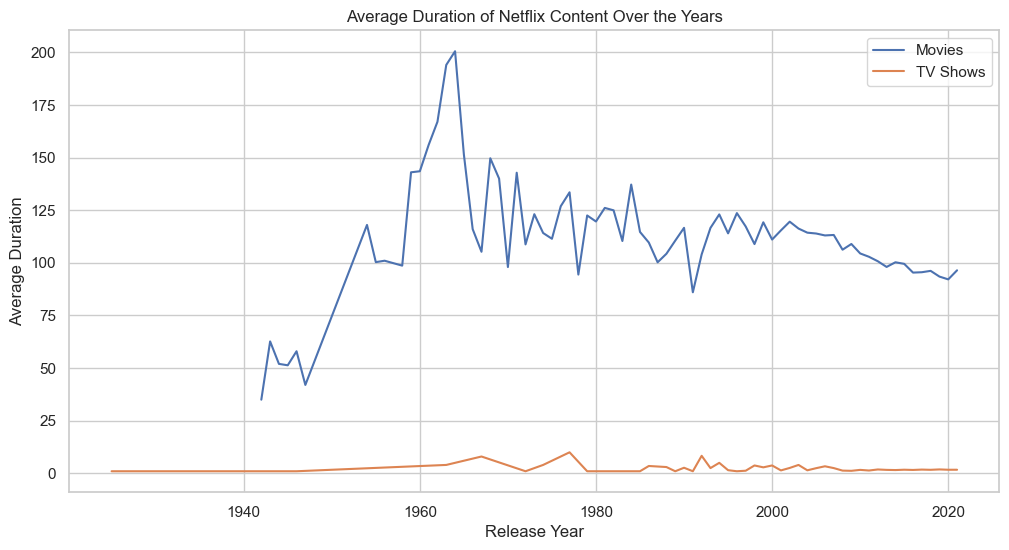

In [57]:
# Separate movies and TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Parse duration data for movies
movies['duration'] = pd.to_numeric(movies['duration'].str.replace(' min', ''), errors='coerce')

# Parse duration data for TV shows
tv_shows['duration'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Drop NaN values from both datasets
movies.dropna(subset=['duration'], inplace=True)
tv_shows.dropna(subset=['duration'], inplace=True)

# Group by release year and calculate the average duration
avg_movie_duration = movies.groupby('release_year')['duration'].mean()
avg_tv_show_duration = tv_shows.groupby('release_year')['duration'].mean()

# Visualization setup
sns.set(style="whitegrid")

# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(avg_movie_duration, label='Movies')
plt.plot(avg_tv_show_duration, label='TV Shows')
plt.title('Average Duration of Netflix Content Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration')
plt.legend()

plt.show()

<p style="text-align: justify;">The output is a line plot that displays the average duration of Netflix content over the years, comparing movies and TV shows. The x-axis represents the release year, while the y-axis shows the average duration in minutes. Two lines are plotted on the graph: one for movies and another for TV shows. The lines provide insights into how the average duration of these two types of content has changed over time on the Netflix platform.</p>